In [3]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [39]:
df=pd.read_csv('jena_climate_2009_2016.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [40]:
df=df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [41]:
df.index=pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

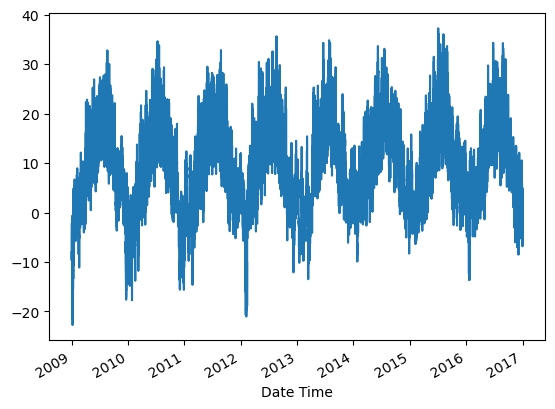

In [42]:
temp=df['T (degC)']
temp.plot()

In [ ]:
def df_to_xy(df,window_size=5):
    df_as_numpy=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_numpy)-window_size):
        row=[[a] for a in df_as_numpy[i:i+5]]
        x.append(row)
        label=df_as_numpy[i+5]
        y.append(label)
    return np.array(x), np.array(y)
    
    

In [44]:
window_size=5
x,y=df_to_xy(temp,window_size)
type(x)

numpy.ndarray

In [45]:
x

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [46]:
x_train,y_train=x[:60000],y[:60000]
x_val,y_val=x[60000:65000],y[60000:65000]
x_test,y_test=x[65000:],y[65000:]
x_train.shape

(60000, 5, 1)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [48]:
model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [49]:
cp=ModelCheckpoint('model1/',save_best_only=True)
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])



In [50]:
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[cp])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 41.3194 - root_mean_squared_error: 6.4280

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 41.2389 - root_mean_squared_error: 6.4217 - val_loss: 1.3934 - val_root_mean_squared_error: 1.1804
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 2.4862 - root_mean_squared_error: 1.5768

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 2.4862 - root_mean_squared_error: 1.5768 - val_loss: 0.6280 - val_root_mean_squared_error: 0.7925
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 1.0002 - root_mean_squared_error: 1.0001

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 1.0002 - root_mean_squared_error: 1.0001 - val_loss: 0.5255 - val_root_mean_squared_error: 0.7249
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7452 - root_mean_squared_error: 0.8633

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.7453 - root_mean_squared_error: 0.8633 - val_loss: 0.5142 - val_root_mean_squared_error: 0.7171
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6890 - root_mean_squared_error: 0.8301 - val_loss: 0.5441 - val_root_mean_squared_error: 0.7376
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6706 - root_mean_squared_error: 0.8189

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6708 - root_mean_squared_error: 0.8190 - val_loss: 0.4951 - val_root_mean_squared_error: 0.7036
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6615 - root_mean_squared_error: 0.8133 - val_loss: 0.5073 - val_root_mean_squared_error: 0.7123
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6552 - root_mean_squared_error: 0.8095

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6552 - root_mean_squared_error: 0.8095 - val_loss: 0.4912 - val_root_mean_squared_error: 0.7009
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6513 - root_mean_squared_error: 0.8070

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6511 - root_mean_squared_error: 0.8069 - val_loss: 0.4901 - val_root_mean_squared_error: 0.7000
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.5080 - val_root_mean_squared_error: 0.7127


In [54]:
from tensorflow.keras.models import load_model
model1=load_model('model1/')

In [55]:
train_pred=model1.predict(x_train).flatten()
train_results=pd.DataFrame(data={'Train Predictions':train_pred,'Actuals':y_train})
train_results

1875/1875 [==============================] - 5s 3ms/step


,Train Predictions,Actuals
0,-9.994767,-9.67
1,-9.768427,-9.17
2,-8.819668,-8.10
3,-7.294073,-7.66
4,-7.240354,-7.04
...,...,...
59995,6.141848,6.07
59996,7.190933,9.88
59997,12.202886,13.53
59998,16.170185,15.43


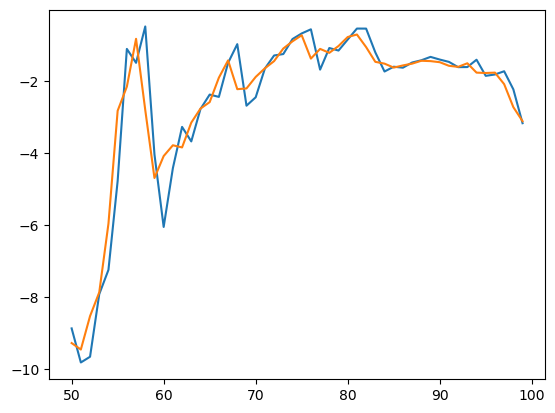

In [58]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [59]:
val_pred=model1.predict(x_val).flatten()
val_results=pd.DataFrame(data={'Val Predictions':val_pred,'Actuals':y_val})
val_results

157/157 [==============================] - 1s 3ms/step


,Val Predictions,Actuals
0,15.457860,14.02
1,13.278755,13.67
2,13.017276,12.27
3,11.476724,11.19
4,10.403007,10.85
...,...,...
4995,17.273283,18.27
4996,17.323799,17.85
4997,17.109295,16.65
4998,15.856643,15.85


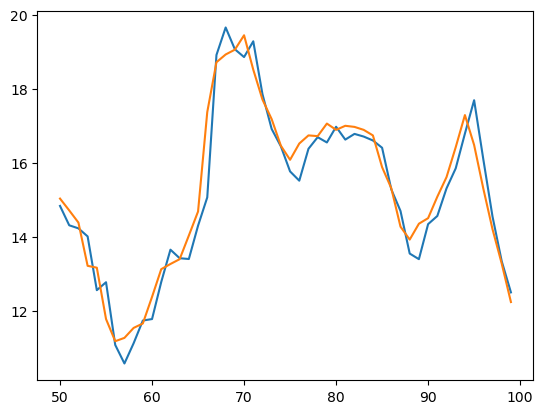

In [60]:
plt.plot(val_results['Val Predictions'][50:100])
plt.plot(val_results['Actuals'][50:100])

In [61]:
test_pred=model1.predict(x_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':test_pred,'Actuals':y_test})
test_results

159/159 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,14.361613,13.99
1,13.230479,13.46
2,12.847052,12.93
3,12.450128,12.43
4,12.018085,12.17
...,...,...
5081,-1.177027,-0.98
5082,-1.431191,-1.40
5083,-1.672459,-2.75
5084,-3.365558,-2.89


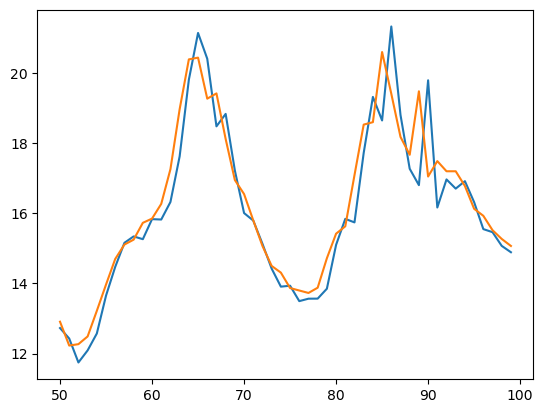

In [62]:
plt.plot(test_results['Test Predictions'][50:100])
plt.plot(test_results['Actuals'][50:100])